# Water Potability Data Exploratory Analysis
## by (your name here)

## Introduction
> To make sure that you have good health it is important to have access to clean drinking water. Water is an important part of our lives and it is imporatnt to consume clean drinking water in order to maintain our health. Having access to clean drinking water is also a fundamental human right. At the national, regional, and municipal levels, this is crucial as a matter of health and development. Investments in water supply and sanitation have been demonstrated to provide a net economic advantage in some areas because they reduce negative health impacts and medical expenses more than they cost to implement.

>The water_potability.csv file contains water quality metrics for 3276 different water bodies.

>pH value: Before consuming the water it is important to check its acid base balance of the water. The ph tells us whetehr the water is acidic or alkaline. The highest pH of water allowed by WHO is between 6.5 and 8.5. 

>Hardness: Hardness of water is the result of salts of magesium and calcium. These salts are released in the water by geologic formations. The amount of time these salts are in the water also plays an important role in determining the hardness of water. The ability of water to form soap due to calcium and magnesium precipitation was the original definition of hardness.

>Solids (Total dissolved solids - TDS): Many inorganic and some organic minerals or salts, including potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulphates, and others, may be dissolved by water. These dissolved solids in water give the water a undesirable flavour . This attribute plays an important role in determining the potability of water. The recommended TDS level for drinking purposes is 500 mg/l, with a maximum limit of 1000 mg/l.

>Chloramines: For disinfecting the water two main chemicals used are chlorine and chromine. Drinking water is treated with chlorine and ammonia and this results in chloramine formation. Drinking water can include up to 4 mg/L of chlorine (or 4 ppm), which is regarded as a safe quantity.

>Sulfate: Sulfates are organic compounds and they can be found in various naturally occuring substances like rocks, soils and minerals. They are found in nature eg in air, groundwater, vegetation and food. Sulphates are also used for commercial purposes in chemical industries. SAaltwater contains 2,700 mg/L. Some fresh water sources have around 3 and 30 mg/L while other regions have higher levels of sulphates around 1000 mg/L. 

>Conductivity: Pure water is not a good conductor of electricity rather it is a good insulator. With the increase in concentration of ions in water we can increase the conductivity. According to WHO guidelines, the EC value shouldn't be more than 400 S/cm.

>Organic_carbon:Organic carbon in source water is made of decomposing natural organic matter (NOM) and synthetic sources. US EPA estimates that treated drinking water has 2 mg/L of TOC and that source water, which is used for treatment, contains 4 mg/Lit.

>Trihalomethanes: Chlorine treated water contains chemicals called THMs. The concentration of THM in water is affected by quatity of chlorine needed to treat the water, organic matter, and the temperature of the drinking water.THM concentrations up to 80 ppm are regarded as safe for drinking water.

>Turbidity: Turbidity of water depends on how much solid matter is present in a suspended condition. The quality of the waste discharge with regard to collodial particles and measurement of light-emitting capabilities of water is determined using this test.The Wondo Genet Campus's mean turbidity value (0.98 NTU) is less than the WHO-recommended threshold of 5.00 NTU.

>Potability: It tells us if the water is safe for drinking or not.

## Preliminary Wrangling


In [73]:
import numpy as np
import pandas as pd
#Importing Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [74]:
import warnings
warnings.filterwarnings('ignore')

In [75]:
final_df=pd.read_csv('water_potability.csv')

### What is the structure of your dataset?

In [76]:
final_df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [77]:
final_df.shape

(3276, 10)

observation: the dataset contains 3276 rows and 10 columns

### What is/are the main feature(s) of interest in your dataset?

In [78]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


we will use different features like ph, hardness, solids, chloramines, sulfate, conductivity, organic carbon, trihalomethanes, turbidity to predict whether the water is potable or not. The potability column tells us whether the water is safe for drinking or not. We will further investigate which features have outliers that can reduce the accuracy of the model.

In [79]:
#Statistical Analysis
final_df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [80]:
sns.pairplot(data=final_df)

In [81]:
#Checking the Null values of each column
final_df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

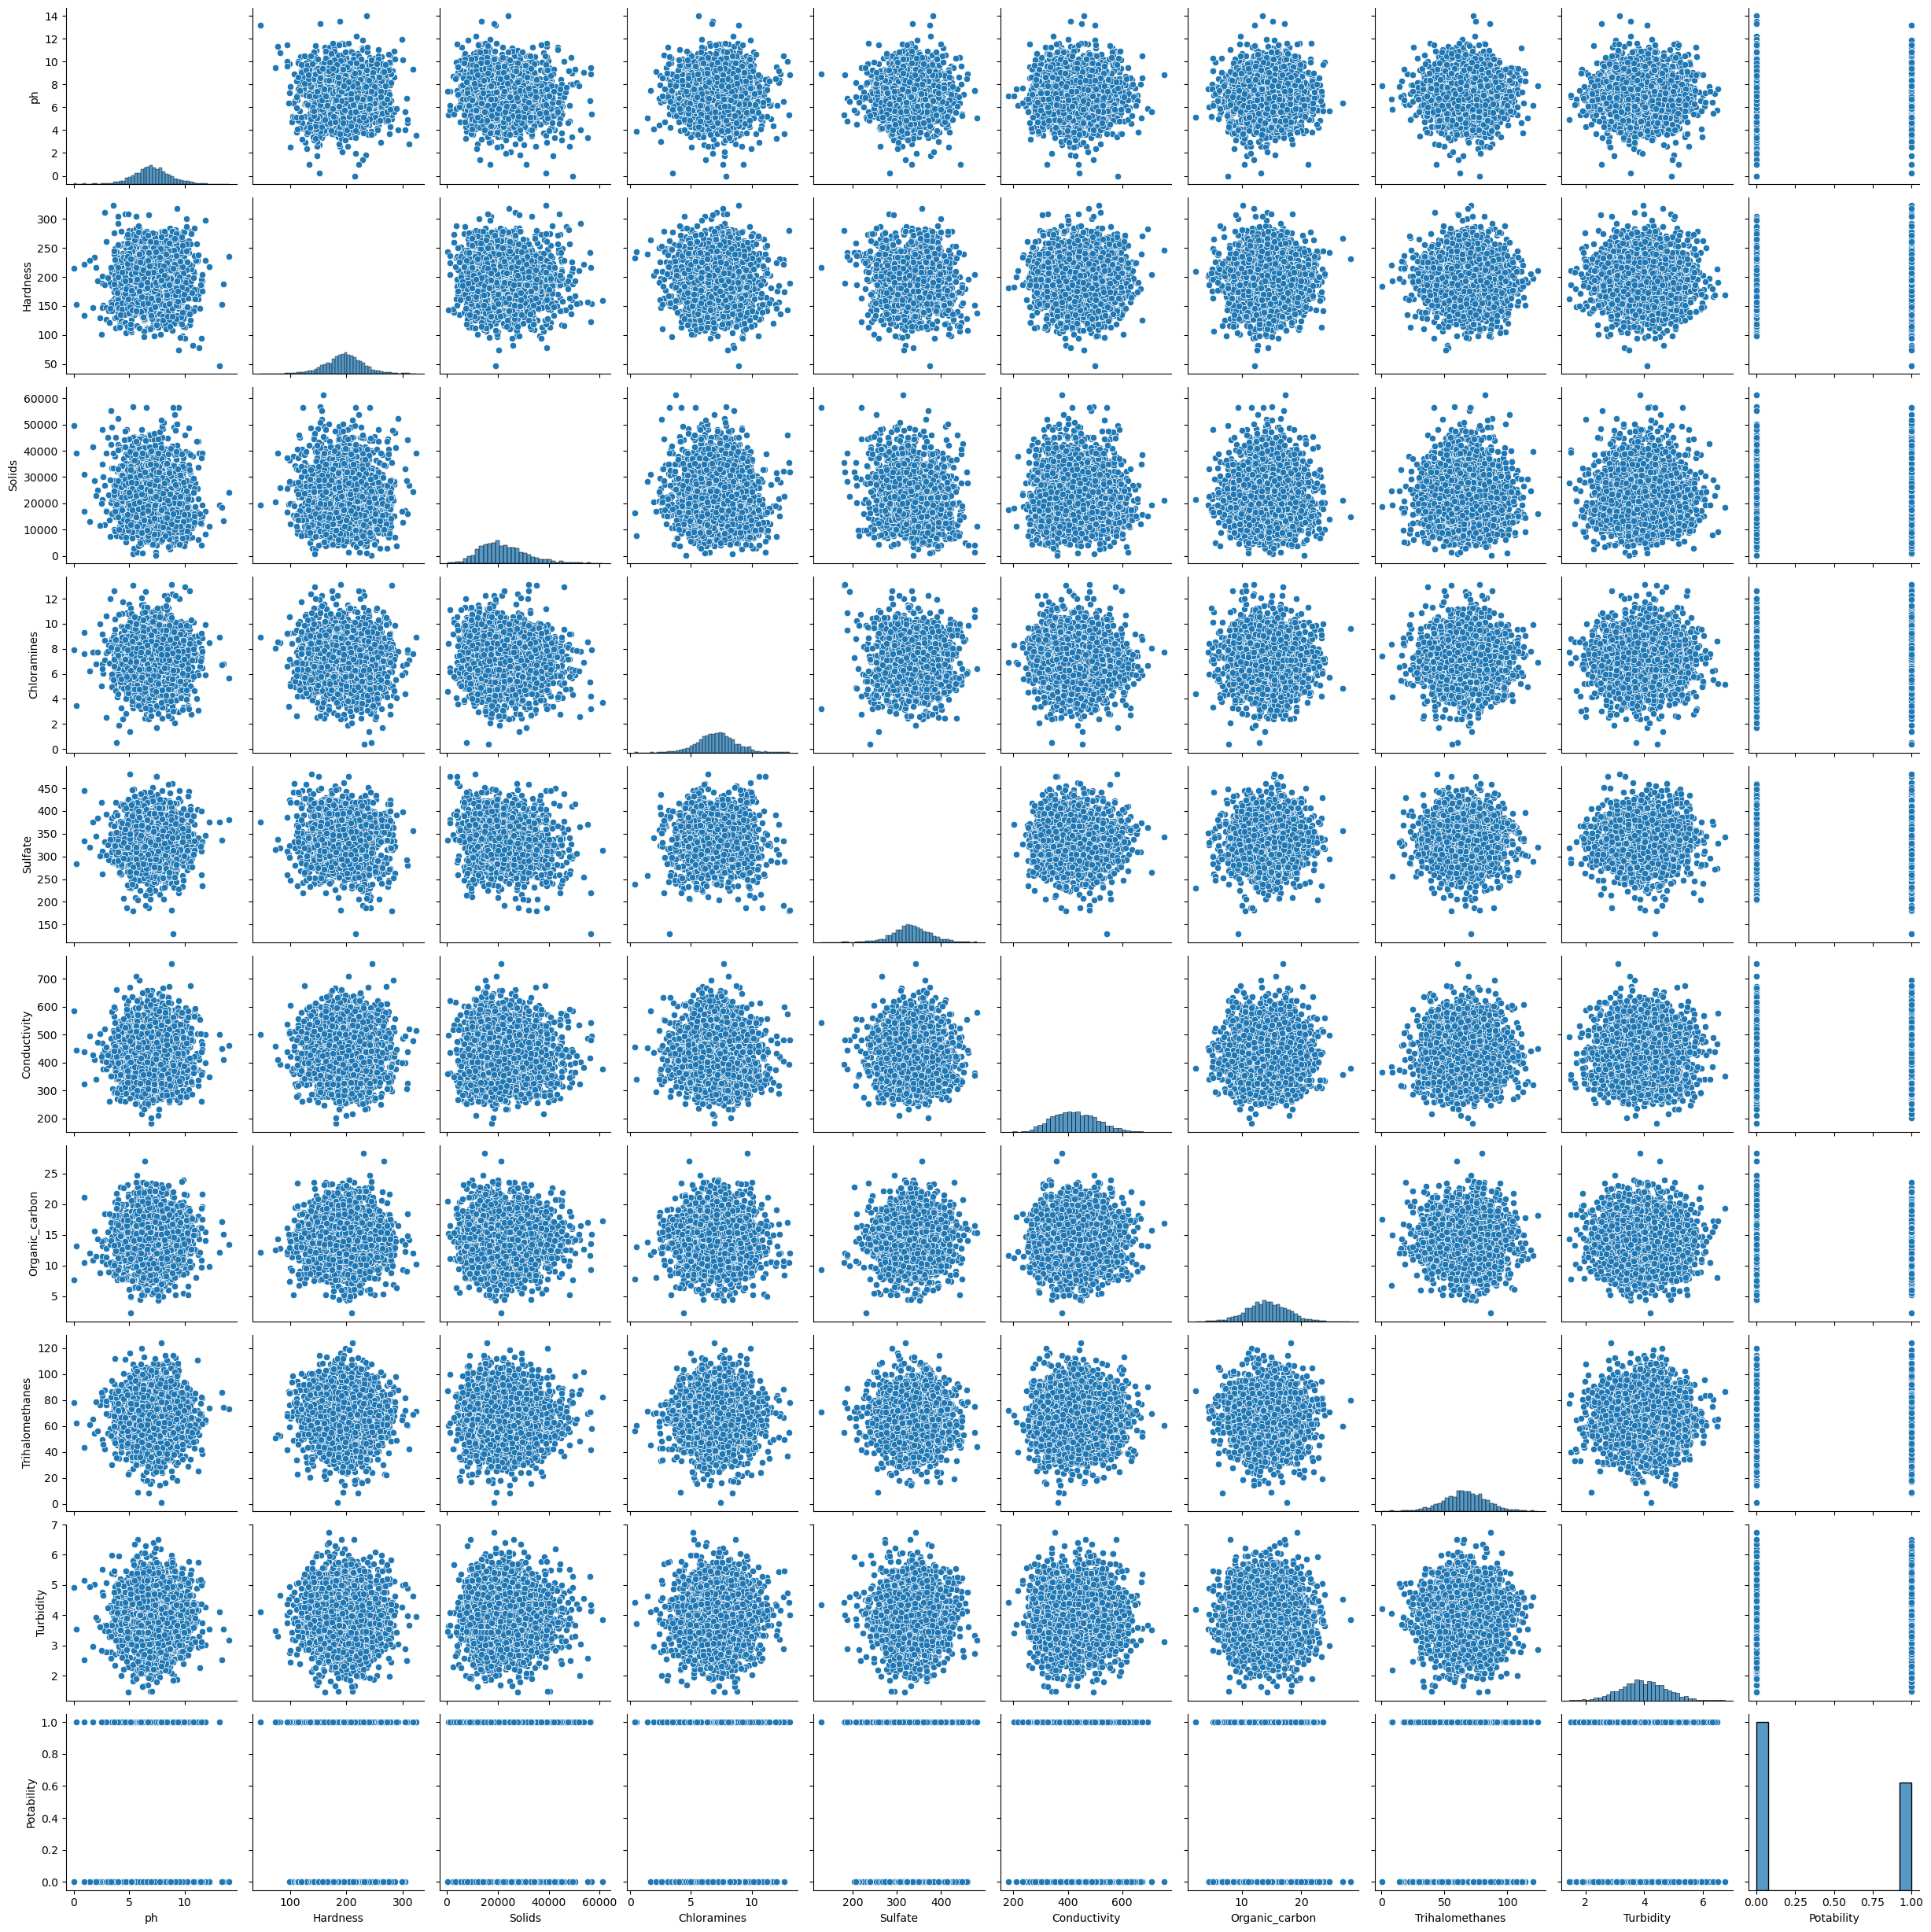

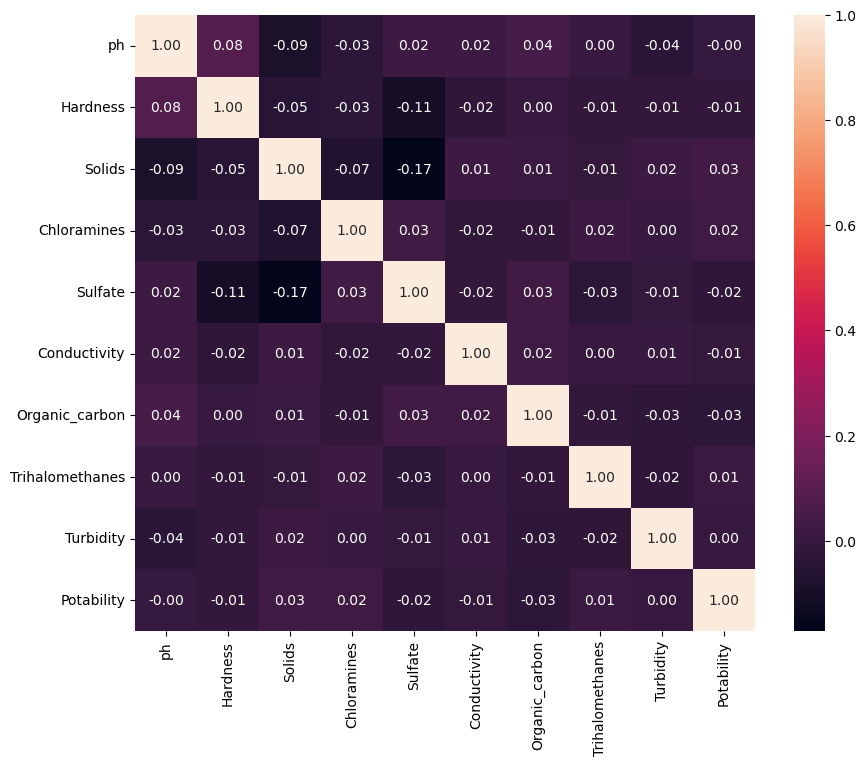

In [82]:
#Visualizing the Correlation Matrix of Features
plt.figure(figsize=(10,8))
sns.heatmap(final_df.corr(),annot=True,fmt='.2f')
plt.show()

Feature contains Few Outliers.Every Feature is not highly correlated with Potability Feature.


Insights:
Remove all Outliers in order to improve the Accuracy of the model.

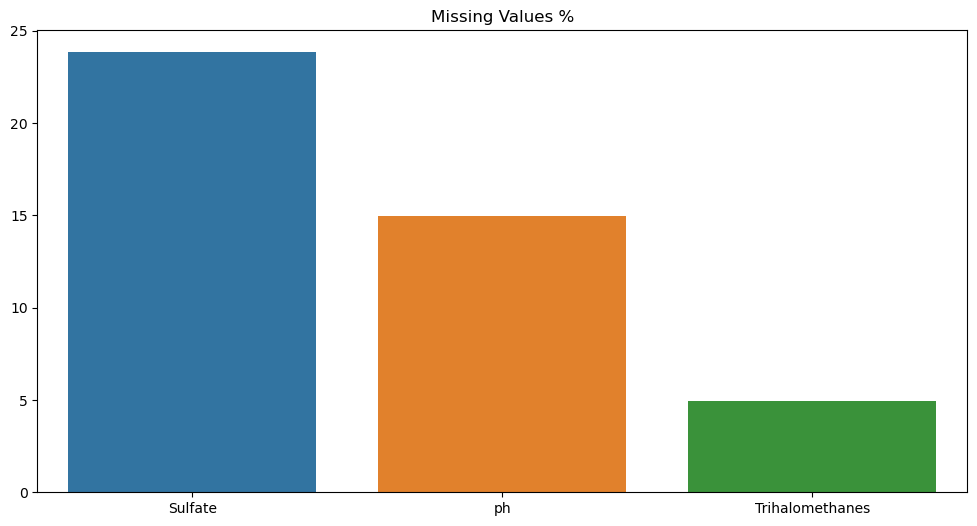

In [83]:
plt.figure(figsize=(12,6))
missing_values=round(final_df.isna().sum()*100/len(final_df),2)
missing_values=missing_values[missing_values>0]
missing_values.sort_values(inplace=True,ascending=False)
sns.barplot(x=missing_values.index,y=missing_values.values)
plt.title('Missing Values %')
plt.show()


observation: 
two columns are there that have Null values.
The column names are sulphate, ph and Trihalomethanes

In [84]:
upper=final_df['ph'].mean() + 3*final_df['ph'].std()
lower=final_df['ph'].mean() - 3*final_df['ph'].std()
print('Upper Limit is {} and Lower Limit is {}'.format(upper,lower))

Upper Limit is 11.863753060403255 and Lower Limit is 2.297835948150383


Observation:

The Upper Limit of ph distribution is 11.86
The Lower Limit of ph distribution is 2.29
Insight:
This will help to remove the Outliers.

In [85]:
upper_har=final_df['Hardness'].mean() + 3*final_df['Hardness'].std()
lower_har=final_df['Hardness'].mean() - 3*final_df['Hardness'].std()
print('Upper Limit is {} and Lower Limit is {}'.format(upper_har,lower_har))

Upper Limit is 295.00878044618435 and Lower Limit is 97.73021158841922


In [86]:
upper_cond=final_df['Conductivity'].mean() + 3*final_df['Conductivity'].std()
lower_cond=final_df['Conductivity'].mean() - 3*final_df['Conductivity'].std()
print('Upper Limit is {} and Lower Limit is {}'.format(upper_cond,lower_cond))

Upper Limit is 668.6773028358875 and Lower Limit is 183.73291852921665


In [87]:
upper_car=final_df['Organic_carbon'].mean() + 3*final_df['Organic_carbon'].std()
lower_car=final_df['Organic_carbon'].mean() - 3*final_df['Organic_carbon'].std()
print('Upper Limit is {} and Lower Limit is {}'.format(upper_car,lower_car))

Upper Limit is 24.20945624505794 and Lower Limit is 4.360484250296732


In [88]:
upper_tri=final_df["Trihalomethanes"].mean() + 3*final_df["Trihalomethanes"].std()
lower_tri=final_df["Trihalomethanes"].mean() - 3*final_df["Trihalomethanes"].std()
print('Upper Limit is {} and Lower Limit is {}'.format(upper_tri,lower_tri))

Upper Limit is 114.92131821342397 and Lower Limit is 17.871267680112084


In [89]:
upper_tur=final_df['Turbidity'].mean() + 3*final_df['Turbidity'].std()
lower_tur=final_df['Turbidity'].mean() - 3*final_df['Turbidity'].std()
print('Upper Limit is {} and Lower Limit is {}'.format(upper_tur,lower_tur))

Upper Limit is 6.307933395247293 and Lower Limit is 1.6256389443348227


In [90]:
upper_chl=final_df['Chloramines'].mean() + 3*final_df['Chloramines'].std()
lower_chl=final_df['Chloramines'].mean() - 3*final_df['Chloramines'].std()
print('Upper Limit is {} and Lower Limit is {}'.format(upper_chl,lower_chl))

Upper Limit is 11.871531460544917 and Lower Limit is 2.3730221263066564


In [91]:
#Checking the Outliers in Sulfate feature using 3-Standard Deviation method
upper_sul=final_df['Sulfate'].mean() + 3*final_df['Sulfate'].std()
lower_sul=final_df['Sulfate'].mean() - 3*final_df['Sulfate'].std()
print('Upper Limit is {} and Lower Limit is {}'.format(upper_sul,lower_sul))

Upper Limit is 458.02629799583144 and Lower Limit is 209.52525522579535


In [92]:
#Checking the Outliers in Solids feature using 3-Standard Deviation method
upper_sol=final_df['Solids'].mean() + 3*final_df['Solids'].std()
lower_sol=final_df['Solids'].mean() - 3*final_df['Solids'].std()
print('Upper Limit is {} and Lower Limit is {}'.format(upper_sol,lower_sol))

Upper Limit is 48319.80500943491 and Lower Limit is -4291.619957280687


since there are missing values in  ph, sulphate and trihalomethanes we have used the upper limit and lower limits found above to fill in the missing values. 

In [93]:
sulfate_mean=final_df[(final_df['Sulfate']>=lower_sul) &(final_df['Sulfate']<=upper_sul)]['Sulfate'].mean()
final_df['Sulfate'].fillna(sulfate_mean,inplace=True)
#ph Mean
ph_mean=final_df[(final_df['ph']>=lower) &(final_df['ph']<=upper)]['ph'].mean()
final_df['ph'].fillna(ph_mean,inplace=True)
#Trihalomethanes Mean
tri_mean=final_df[(final_df['Trihalomethanes']>=lower_tri) &(final_df['Trihalomethanes']<=upper_tri)]['Trihalomethanes'].mean()
final_df['Trihalomethanes'].fillna(tri_mean,inplace=True)

In [94]:
final_df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [95]:
#Removing the Outliers

final_df=final_df[(final_df['ph']>=lower) & (final_df['ph']<=upper)&
                  (final_df['Hardness']>=lower_har)&(final_df['Hardness']<=upper_har)&
                (final_df['Solids']>=lower_sol)&(final_df['Solids']<=upper_sol)&
                (final_df['Chloramines']>=lower_chl)&(final_df['Chloramines']<=upper_chl)&
                 (final_df['Sulfate']>=lower_sul)&(final_df['Sulfate']<=upper_sul)&
                 (final_df['Conductivity']>=lower_cond)&(final_df['Conductivity']<=upper_cond)&
                 (final_df['Organic_carbon']>=lower_car)&(final_df['Organic_carbon']<=upper_car) &
                 (final_df['Trihalomethanes']>=lower_tri)&(final_df['Trihalomethanes']<=upper_tri)&
                 (final_df['Turbidity']>=lower_tur)&(final_df['Turbidity']<=upper_tur)]

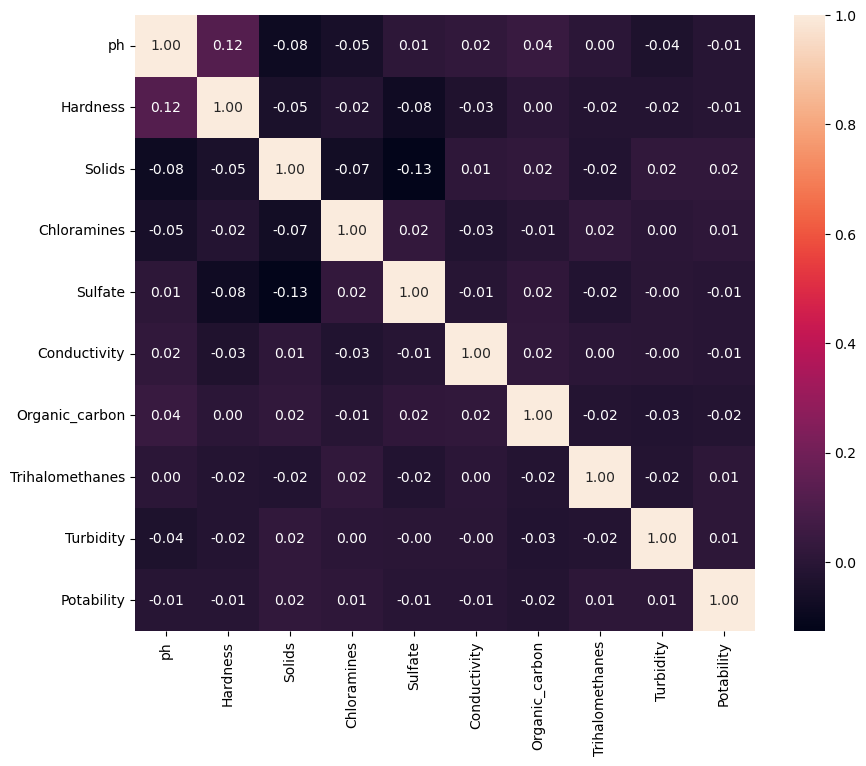

In [96]:
#Visualizing the Correlation Matrix of Features
plt.figure(figsize=(10,8))
sns.heatmap(final_df.corr(),annot=True,fmt='.2f')
plt.show()

The correlation matrix of the new updated dataset gives almost neglegible outliers but even after correcting outliers Solids and Sulphates have high negative correlation i.e maximum outliers. Thus we drop them to achieve better accuracy.

In [97]:
final_df=final_df.drop('Sulfate', axis=1)
final_df=final_df.drop('Solids', axis=1)

In [98]:
print(final_df.shape)
print(final_df)


(3161, 8)
            ph    Hardness  Chloramines  Conductivity  Organic_carbon  \
0     7.085068  204.890455     7.300212    564.308654       10.379783   
1     3.716080  129.422921     6.635246    592.885359       15.180013   
2     8.099124  224.236259     9.275884    418.606213       16.868637   
3     8.316766  214.373394     8.059332    363.266516       18.436524   
4     9.092223  181.101509     6.546600    398.410813       11.558279   
...        ...         ...          ...           ...             ...   
3271  4.668102  193.681735     7.166639    526.424171       13.894419   
3272  7.808856  193.553212     8.061362    392.449580       19.903225   
3273  9.419510  175.762646     7.350233    432.044783       11.039070   
3274  5.126763  230.603758     6.303357    402.883113       11.168946   
3275  7.874671  195.102299     7.509306    327.459760       16.140368   

      Trihalomethanes  Turbidity  Potability  
0           86.990970   2.963135           0  
1           56.3290

After removing null values and dropping columns with outliers we have 3161 rows and 8 columns in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

In [99]:
#Analyzing the Potability column
final_df['Potability'].value_counts()

0    1950
1    1211
Name: Potability, dtype: int64

## Univariate Exploration

In [100]:
#Visualizing the Potability column
fig=px.pie(final_df,values=final_df['Potability'].value_counts(),
          names=[0,1],
          title='<b>Potability Percentage',
          hole=0.4,
          color_discrete_sequence=px.colors.qualitative.Pastel,
          template='plotly_dark')
fig.update_layout(title_font_size=30)
fig.show()


Potablity: If Water safe for Drinking

Potable---> 1(Water safe for Drinking)
Not Potable--->0(Water not safe for Drinking)

Observation
61% of Water is not safe for Drinking and 39% is safe for Drinking

In [101]:
#Analyzing the ph feature
fig=px.histogram(final_df,x="ph",nbins=40,color_discrete_sequence=["#ffff00"],title="<b>PH Distribution",text_auto=True)
fig.update_layout(template="plotly_dark" )

fig.show()


observation: The PH is Normally Distributed.

In [102]:
# Analyzing the Hardness of the Water
fig=px.histogram(final_df,x="Hardness",nbins=40,color_discrete_sequence=["#80ffff"],title="<b>Hardness Distribution",text_auto=True)
fig.update_layout(template='plotly_dark')
fig.show()

observation: 
The Distribution of ph related to Potability is almost same.
The Not Potable Water has more Ph level than of Potable Water.

In [103]:
# Analyzing the Chloramines of the Water
fig=px.histogram(final_df,x="Chloramines",nbins=40,color_discrete_sequence=["#99ff99"],title="<b>Chloramines Distribution",text_auto=True)
fig.update_layout(template='plotly_dark')
fig.show()


In [104]:
# Analyzing the Conductivity of the Water
fig=px.histogram(final_df,x="Conductivity",nbins=40,color_discrete_sequence=["#f0b3ff"],title="<b>Conductivity Distribution",text_auto=True)
fig.update_layout(template='plotly_dark')
fig.show()

In [105]:
# Analyzing the Organic_carbon of the Water
fig=px.histogram(final_df,x="Organic_carbon",nbins=40,color_discrete_sequence=["#ff99c2"],title="<b>Organic_carbon Distribution",text_auto=True)
fig.update_layout(template='plotly_dark')
fig.show()

In [106]:
# Analyzing the Trihalomethanes of the Water
fig=px.histogram(final_df,x="Trihalomethanes",nbins=40,color_discrete_sequence=["#00b3b3"],title="<b>Trihalomethanes Distribution",text_auto=True)
fig.update_layout(template='plotly_dark')
fig.show()

In [107]:
# Analyzing the Turbidity of the Water
fig=px.histogram(final_df,x="Turbidity",nbins=40,color_discrete_sequence=["#ffb366"],title="<b>Turbidity Distribution",text_auto=True)
fig.update_layout(template='plotly_dark')
fig.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> All the variables are normally distributed. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> As seen in the correlation matrix almost all of the features have outliers and ph , sulphate and trihalomethanes have missing values. So we use the upper and lower limits of the features and find the mean and fill in the missing values and also correct the outliers. We do this to increase the correlation of features and to improve the accuracy of the model when we use the dataset. We drop the sulphate and solids column as they have high negative correlation. 

## Bivariate Exploration

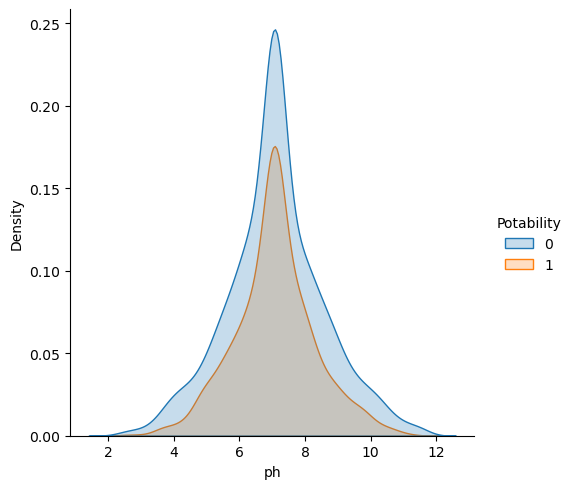

In [108]:
# Bivariate Analysis of ph with Potability

sns.displot(x=final_df['ph'],hue=final_df['Potability'],kind='kde',fill=True)
plt.show()

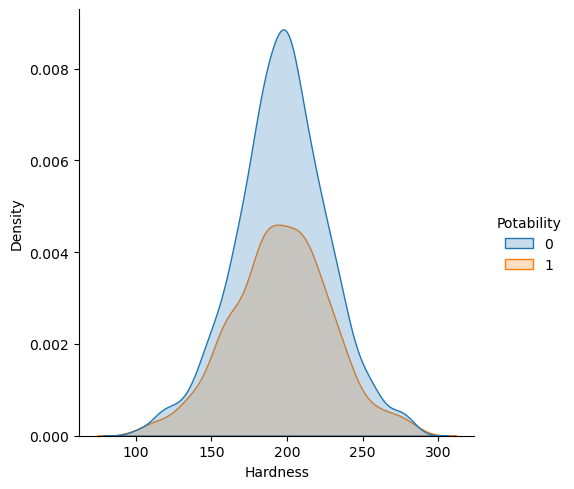

In [109]:
 #Bivariate Analysis of Hardness with Potability

sns.displot(x=final_df['Hardness'],hue=final_df['Potability'],kind='kde',fill=True)
plt.show()

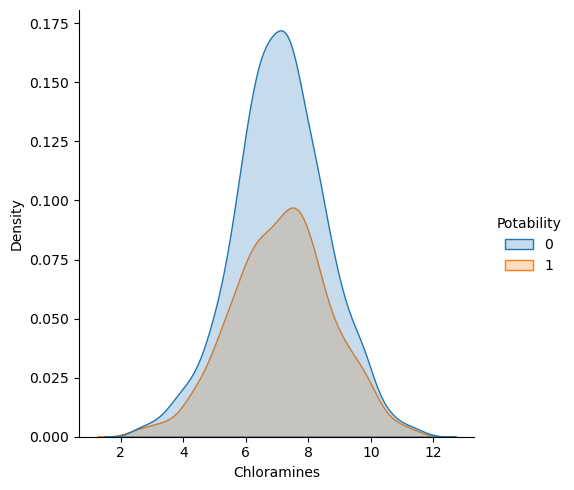

In [110]:
sns.displot(x=final_df['Chloramines'],hue=final_df['Potability'],kind='kde',fill=True)
plt.show()

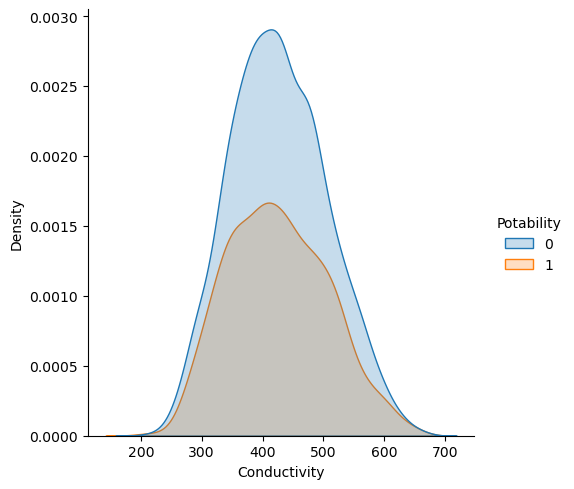

In [111]:
sns.displot(x=final_df['Conductivity'],hue=final_df['Potability'],kind='kde',fill=True)
plt.show()

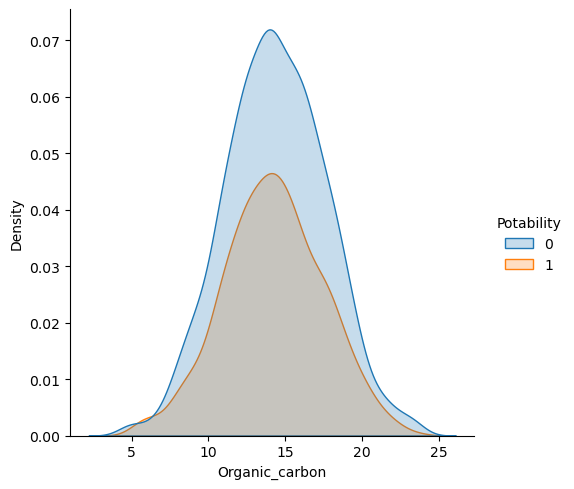

In [112]:
sns.displot(x=final_df['Organic_carbon'],hue=final_df['Potability'],kind='kde',fill=True)
plt.show()

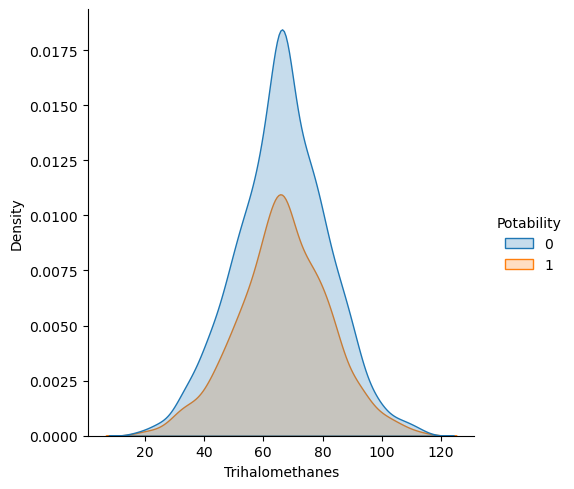

In [113]:
sns.displot(x=final_df['Trihalomethanes'],hue=final_df['Potability'],kind='kde',fill=True)
plt.show()

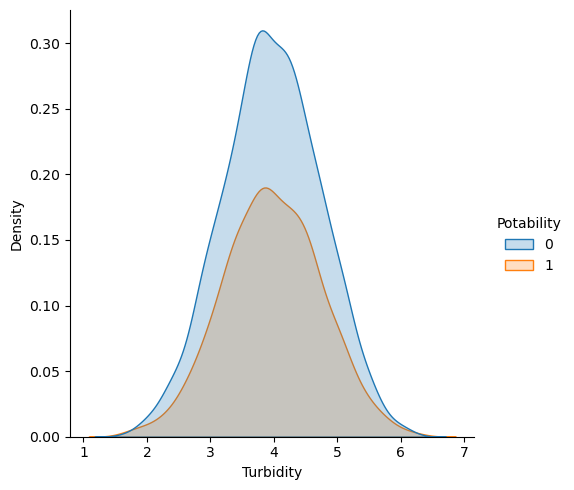

In [114]:
sns.displot(x=final_df['Turbidity'],hue=final_df['Potability'],kind='kde',fill=True)
plt.show()

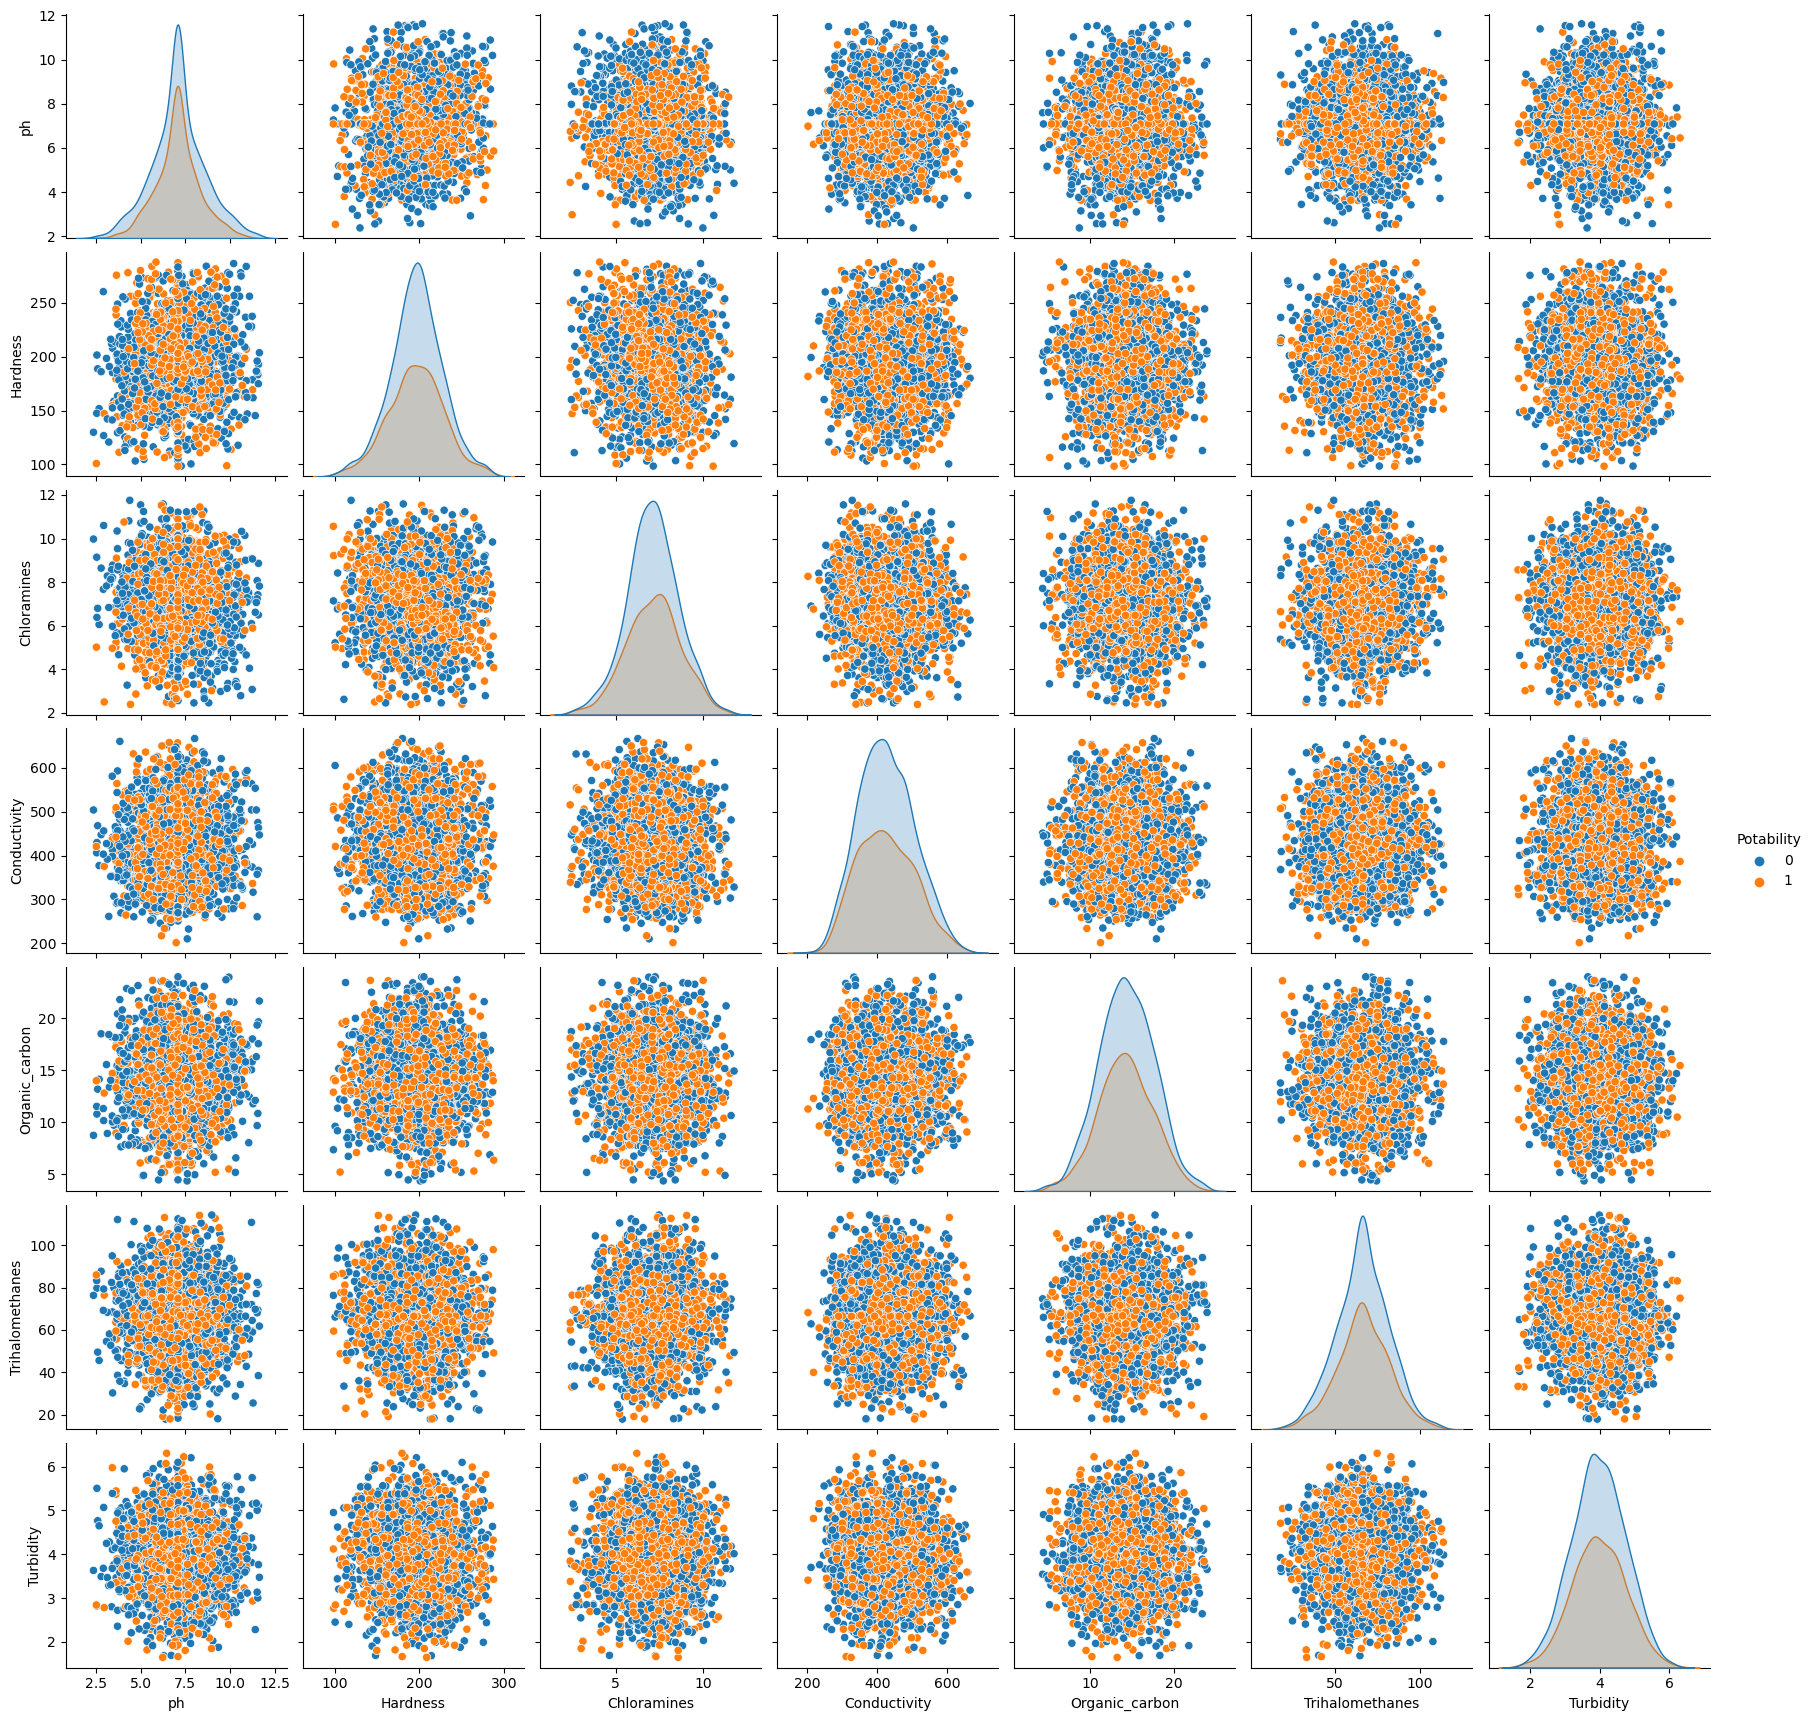

In [115]:
sns.pairplot(final_df,hue='Potability')
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> we perform bivariate analysis of potability with every other feature and we see that with the increase in most features the water become snot potable. i.e the potability of water decreases. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> We see that hardness and ph have the highest correlation i.e they play the most important roles in determining the potability of water.

## Multivariate Exploration

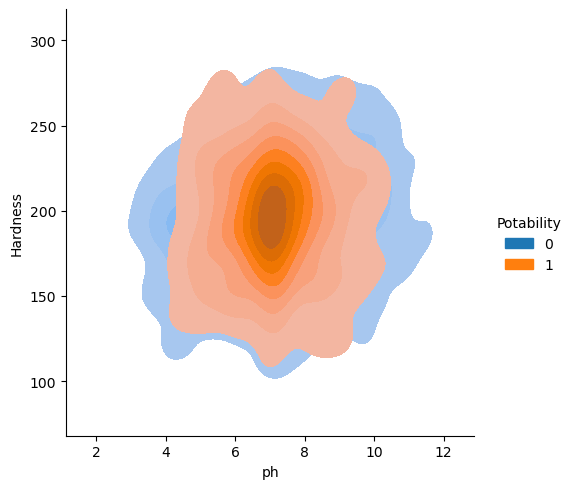

In [116]:
sns.displot(x=final_df['ph'],y=final_df['Hardness'],hue=final_df['Potability'],kind='kde',fill=True)
plt.show()

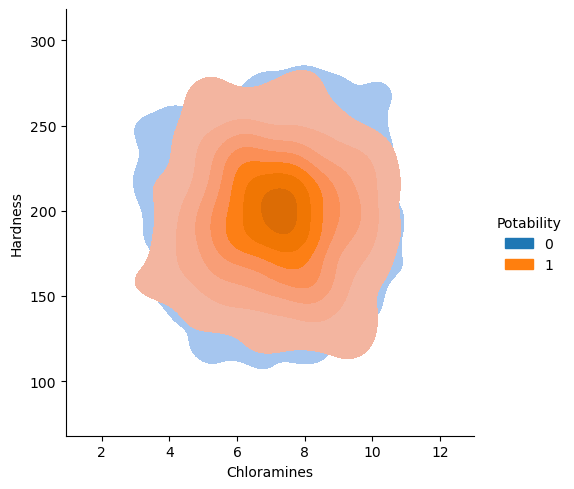

In [117]:
sns.displot(x=final_df['Chloramines'],y=final_df['Hardness'],hue=final_df['Potability'],kind='kde',fill=True)
plt.show()

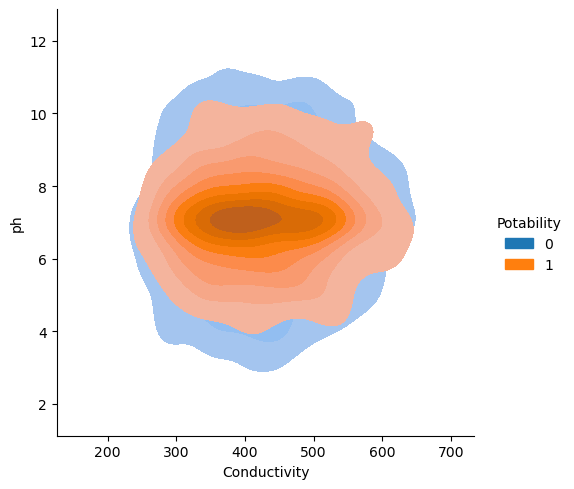

In [118]:
sns.displot(x=final_df['Conductivity'],y=final_df['ph'],hue=final_df['Potability'],kind='kde',fill=True)
plt.show()

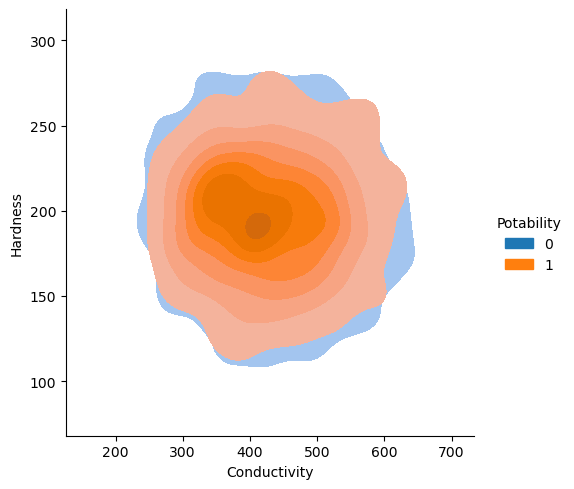

In [119]:
sns.displot(x=final_df['Conductivity'],y=final_df['Hardness'],hue=final_df['Potability'],kind='kde',fill=True)
plt.show()

## Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> We observe the relationship between ph and conductivity and see that the conductivity is affected by the ph levels which in return affects th epotability of water. We also observe the relationship between hardness and conductivity and ph and hardness. 

### Were there any interesting or surprising interactions between features?

> We see that the ph of water is affected by the hardness of water as hardness is the results of salts in water. Thus affecting the potability of water. 

## Conclusions
>Through this exploratory data analysis we have studied the water potability data set. The dataset contains 10 columns namely ph, Hardness,sulfates, solids, chloromines, conductivity, organic carbon, trihalomethanes, turbity and potability. If the potability is 1 that means the water is safe to drink whereas if the potability is 0 the water is not safe to drink. We use all the features to determine if the water is safe to drink or not.Through the correlation matrix we have found that sulphates and solids have negative correletion that is a large number of outliers thus we have dropped those columns to increase our accuracy. We have also found that there are missing values in the dataset for ph and trihalomethanes. Thus we have found their means and filled those missing values. We have seen through univariate analysis that every feature is normally distributes. Through bivariate analysis we have seen that if any of the features has a high value then it makes the water not potable. that is if the pH value is high than it makes the water not potable. Also if the ph value is very low then the water is not potable as well. in case of other features if their value is high then they are not potable. As seen in the correlation matrix the features are not really correlated to each other. The ph value and hardness have the highest correlation therefore we have used multivariate analysis on those to features. It is seen that if the ph is between 5-9 and hardness is between 125-275 the water is potable. Thus we can figure that hardness and ph are the most important features in determining the potability of water. 